<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_08_Niet_stationaire_tijdsreeksen_demogoeduitgelegd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkorange"> Week 08: Niet stationaire tijdsreeksen demo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
# %matplotlib inline
# plt.style.use('seaborn')
# sns.set_style("darkgrid")

In [3]:
dataset = pd.read_csv('bezoekers.csv', index_col='Tijdstip (dag)')
dataset.head()

,Dagelijks aantal bezoekers (in honderden),Dag van de week
Tijdstip (dag),,
0,21,Maandag
1,17,Dinsdag
2,19,Woensdag
3,20,Donderdag
4,21,Vrijdag


## <span style="color:deeppink"> Stationair? </span>
Plot het aantal bezoekers en ga na of de dataset stationair is.

Text(0, 0.5, 'Aantal bezoekers')

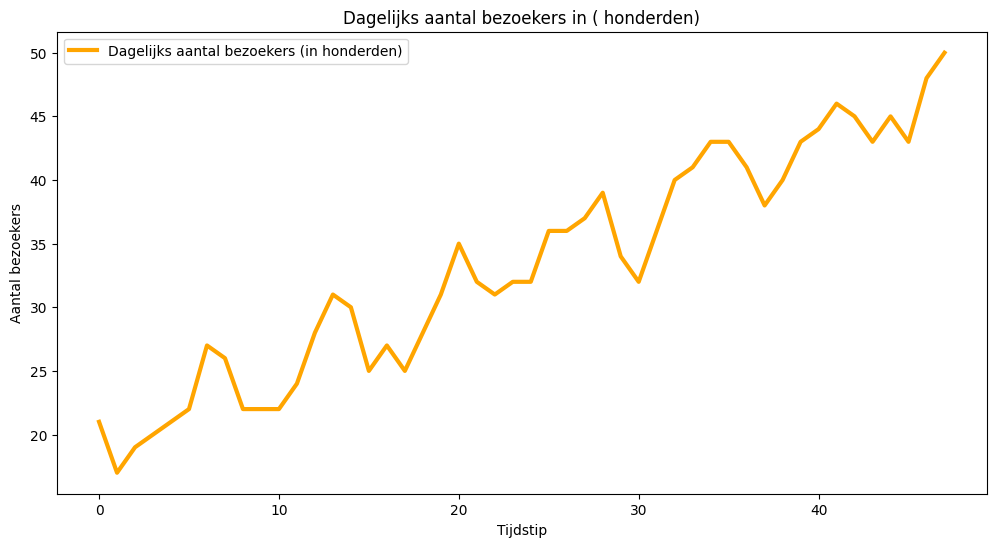

In [4]:
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
plt.title('Dagelijks aantal bezoekers in ( honderden)')
plt.xlabel("Tijdstip")
plt.ylabel("Aantal bezoekers")

In [6]:
from sklearn import datasets,linear_model
x = dataset.index.values
y = dataset['Dagelijks aantal bezoekers (in honderden)'].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)
print('Intercept=',regressionline.intercept_)
print('Richtingscoëfficiënt=',regressionline.coef_[0])

Intercept= 18.790816326530614
Richtingscoëfficiënt= 0.61262483716891


<Axes: xlabel='Tijdstip (dag)'>

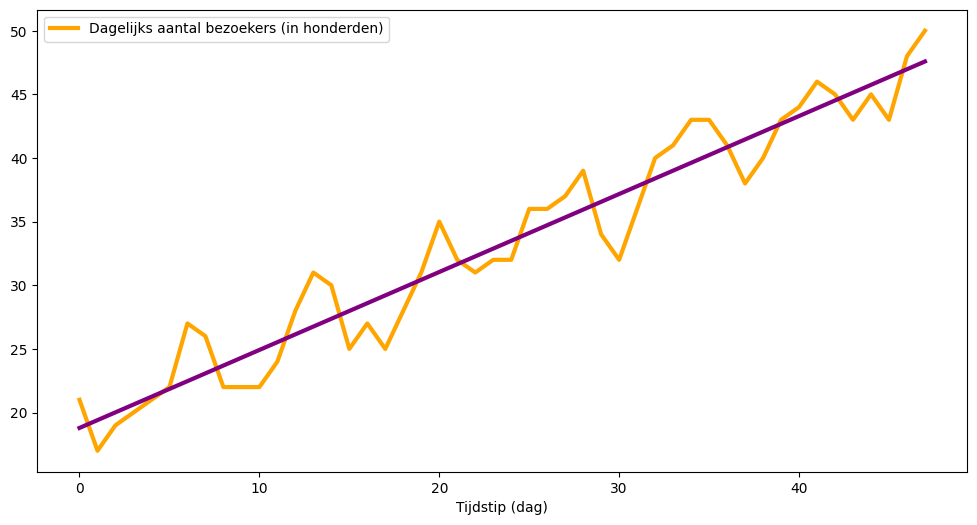

In [7]:
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)

In [8]:
dataset['trendlijn'] = dataset.index*regressionline.coef_[0] + regressionline.intercept_
dataset.head()

,Dagelijks aantal bezoekers (in honderden),Dag van de week,trendlijn
Tijdstip (dag),,,
0,21,Maandag,18.790816
1,17,Dinsdag,19.403441
2,19,Woensdag,20.016066
3,20,Donderdag,20.628691
4,21,Vrijdag,21.241316


Zeker! Deze code maakt deel uit van een **lineaire regressievoorspelling op tijdreeksen** met behulp van `scikit-learn`. Laten we de regel **stap voor stap uitleggen**:

---

### 🧩 Code:

```python
dataset['trendlijn'] = dataset.index * regressionline.coef_[0] + regressionline.intercept_
```

---

### 📌 Betekenis per deel:

| Onderdeel                   | Uitleg                                                                             |
| --------------------------- | ---------------------------------------------------------------------------------- |
| `dataset.index`             | De index van de rijen in de DataFrame (bijvoorbeeld dagnummer 0, 1, 2, ...)        |
| `regressionline`            | Een getraind regressiemodel, meestal een `LinearRegression()` object van `sklearn` |
| `regressionline.coef_[0]`   | De **helling** van de regressielijn (`a` in `y = ax + b`)                          |
| `regressionline.intercept_` | De **snijpunt** met de y-as (`b` in `y = ax + b`)                                  |

---

### 🧠 Wat doet deze regel?

Ze berekent de **voorspelde waarde van de trendlijn** voor elk tijdstip (index) volgens de regressievergelijking:

```python
y = a * x + b
```

waarbij:

* `x` = tijdstip (index)
* `a` = helling van de lijn (`coef_[0]`)
* `b` = beginwaarde (`intercept_`)

En slaat dit op in een nieuwe kolom `trendlijn`.

---

### 🔎 Voorbeeld:

Stel:

* `regressionline.coef_[0] = 2`
* `regressionline.intercept_ = 10`
* Index = 0, 1, 2, ...

Dan wordt de trendlijn:

* Dag 0: `2 * 0 + 10 = 10`
* Dag 1: `2 * 1 + 10 = 12`
* ...

---

### ✅ Gevolg:

Je krijgt een kolom `trendlijn` in je dataset die de **voorspelde waarde per tijdstip** weergeeft volgens een lineaire trend.

Wil je dat ik ook laat zien hoe je die trendlijn grafisch weergeeft samen met de echte waarden?


In [9]:
dataset['residuen'] =dataset['Dagelijks aantal bezoekers (in honderden)'] - dataset['trendlijn']
dataset.head()

,Dagelijks aantal bezoekers (in honderden),Dag van de week,trendlijn,residuen
Tijdstip (dag),,,,
0,21,Maandag,18.790816,2.209184
1,17,Dinsdag,19.403441,-2.403441
2,19,Woensdag,20.016066,-1.016066
3,20,Donderdag,20.628691,-0.628691
4,21,Vrijdag,21.241316,-0.241316


voegt een nieuwe kolom toe aan je dataset, genaamd residuen, en berekent voor elke rij het verschil tussen de echte waarde en de voorspelde waarde via de trendlijn.

Onderdeel	Betekenis
dataset['Dagelijks aantal bezoekers (in honderden)']	De echte waargenomen waarde (y)
dataset['trendlijn']	De voorspelde waarde van het lineaire regressiemodel (ŷ)
-	Berekening van de residu: residu = y - ŷ
dataset['residuen'] = ...	Slaat het verschil op in een nieuwe kolom

🧠 Wat is een residu?
Een residu geeft aan hoe ver de voorspelling afwijkt van de werkelijkheid:

Positief residu → model onderschat de waarde.

Negatief residu → model overschat de waarde.

Residu ≈ 0 → goede voorspelling.

## <span style="color:deeppink"> Autocorrelatie op de residuen </span>

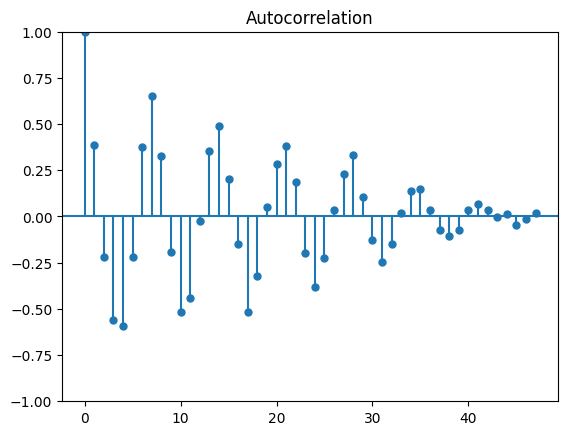

In [10]:
fig = plot_acf(dataset['residuen'],lags = len(dataset)-1, alpha=None)

## <span style="color:deeppink"> Exponentiële demping:
Gebruik de functie `emw` om exponentiele demping toe te passen op de residuen:  
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.ewm.html

 The lowest MAE is: 2.1352740953721785 index:
alpha 0.8130000000000001


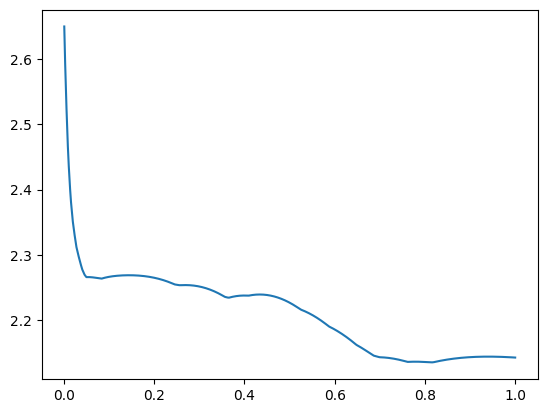

In [11]:
step = 1e-3
alphas = np.arange(start=0,stop=1+step,step = step)
df = pd.DataFrame()
mae = []
for alpha in alphas[1:]:
  exponential = []
  exponential = dataset['residuen'].ewm(alpha=alpha,adjust=False).mean().shift(1)
  mae.append(abs(dataset['residuen'] - exponential).mean())
df['mae']   = mae
df.set_index(alphas[1:],inplace=True)
df.index.name = 'Alpha'
minimum_mae = df['mae'].min()
print(" The lowest MAE is:",minimum_mae,"index:")
print("alpha",df[df['mae'] == minimum_mae].index[0])
plt.plot(df['mae'])



In [12]:
dataset['exponentiele demping'] = dataset['residuen'].ewm(alpha=0.813,adjust=False).mean().shift(1)
dataset.head()

,Dagelijks aantal bezoekers (in honderden),Dag van de week,trendlijn,residuen,exponentiele demping
Tijdstip (dag),,,,,
0,21,Maandag,18.790816,2.209184,NaN
1,17,Dinsdag,19.403441,-2.403441,2.209184
2,19,Woensdag,20.016066,-1.016066,-1.540880
3,20,Donderdag,20.628691,-0.628691,-1.114206
4,21,Vrijdag,21.241316,-0.241316,-0.719482


Zeker! Deze regel:

```python
dataset['exponentiele demping'] = dataset['residuen'].ewm(alpha=0.813, adjust=False).mean().shift(1)
```

maakt een kolom `exponentiele demping` die een **voorspelling berekent op basis van exponentiële demping** (exponential smoothing) toegepast op de **residuen**. Hieronder leg ik het uit, stap voor stap:

---

## 📌 Uitleg per deel:

| Code                                    | Betekenis                                                                                                          |
| --------------------------------------- | ------------------------------------------------------------------------------------------------------------------ |
| `dataset['residuen']`                   | De fout tussen de echte waarden en de trendlijn                                                                    |
| `.ewm(alpha=0.813, adjust=False)`       | Bereken een **Exponentially Weighted Moving Average** met dempingsfactor α = 0.813                                 |
| `.mean()`                               | Geef de voortschrijdend gewogen gemiddelde tijdreeks terug                                                         |
| `.shift(1)`                             | Verschuif alles 1 rij naar **beneden**, zodat de voorspelling alleen gebruikt maakt van het **verleden (lag = 1)** |
| `dataset['exponentiele demping'] = ...` | Sla het resultaat op in een nieuwe kolom                                                                           |

---

## 🧠 Wat is exponentiële demping?

Exponentiële demping gebruikt een formule zoals:

```
voorspelling[t] = α * residu[t-1] + (1 - α) * voorspelling[t-1]
```

Waarbij:

* α (hier 0.813) bepaalt hoeveel gewicht je geeft aan de nieuwste fout.
* Een hogere α maakt je model gevoeliger voor recente veranderingen.

---

## 🧮 Waarom `shift(1)`?

Zonder `.shift(1)` zou je **huidige informatie gebruiken om huidige voorspelling te maken**, wat in tijdreeksen **niet realistisch** is (je mag alleen het verleden gebruiken).

---

## 🧠 Waarom op residuen?

Omdat je later de **voorspelde waarde corrigeert**:

```python
voorspelling = trendlijn + exponentieel_voorspelde_residu
```

Zo voeg je het seizoenseffect dat in de fout zat weer toe op een "slimme" manier.

---

## 📊 Voorbeeld:

Stel:

| Tijdstip | Residu | Voorspelling (demping)    |
| -------- | ------ | ------------------------- |
| 0        | NaN    | NaN                       |
| 1        | 1.0    | NaN                       |
| 2        | -0.5   | 1.0                       |
| 3        | 0.7    | 0.268 (gebaseerd op -0.5) |

---

Wil je dat ik deze reeks in een plot laat zien om het effect van de demping visueel te maken?


## <span style="color:deeppink"> Mean absolute error
Bereken de absolute error van de exponentiele demping:

In [13]:
dataset['absolute fout exponentiele demping'] = abs(dataset['residuen'] - dataset['exponentiele demping'])
dataset.head()

,Dagelijks aantal bezoekers (in honderden),Dag van de week,trendlijn,residuen,exponentiele demping,absolute fout exponentiele demping
Tijdstip (dag),,,,,,
0,21,Maandag,18.790816,2.209184,NaN,NaN
1,17,Dinsdag,19.403441,-2.403441,2.209184,4.612625
2,19,Woensdag,20.016066,-1.016066,-1.540880,0.524814
3,20,Donderdag,20.628691,-0.628691,-1.114206,0.485515
4,21,Vrijdag,21.241316,-0.241316,-0.719482,0.478167


Zeker! Deze regel:

```python
dataset['absolute fout exponentiele demping'] = abs(dataset['residuen'] - dataset['exponentiele demping'])
```

voegt een nieuwe kolom toe die de **absolute fout** berekent van de voorspelling op basis van **exponentiële demping**. Laten we dit ontleden:

---

## 📌 Wat gebeurt hier?

| Onderdeel                                               | Uitleg                                                                                        |
| ------------------------------------------------------- | --------------------------------------------------------------------------------------------- |
| `dataset['residuen']`                                   | De **echte fout** tussen de werkelijke waarde en de trendlijn                                 |
| `dataset['exponentiele demping']`                       | De **voorspelde fout** via exponentiële demping (dus een geschatte correctie op de trendlijn) |
| `dataset['residuen'] - dataset['exponentiele demping']` | Verschil tussen de echte fout en de voorspelde fout                                           |
| `abs(...)`                                              | Absolute waarde van dat verschil (zodat positief en negatief geen invloed hebben)             |
| `dataset['absolute fout exponentiele demping'] = ...`   | Nieuwe kolom die deze fout per rij opslaat                                                    |

---

## 🧠 Wat betekent dit?

Deze fout meet **hoe goed de demping de residuen voorspelt**:

* Kleine waarde = goede voorspelling van het seizoenseffect.
* Grote waarde = de demping zat er ver naast.

Het is een manier om de **kwaliteit van de dempingsmethode** te evalueren.

---

## 📊 Waarom “absolute” fout?

Omdat je dan niet te maken hebt met negatieve en positieve fouten die elkaar opheffen — het is dus betrouwbaarder als maat voor gemiddelde fout.

---

### Voorbeeld:

| Residu | Demping | Verschil | Absolute fout |
| ------ | ------- | -------- | ------------- |
| 1.0    | 0.8     | 0.2      | 0.2           |
| -1.5   | -1.0    | -0.5     | 0.5           |

---

Wil je dat ik een overzicht maak van de gemiddelde fout per methode (trendlijn vs demping vs seizoensregressie)?


In [15]:
print("De mean abosolute error is:",round(dataset['absolute fout exponentiele demping'].mean(),2))

De mean abosolute error is: 2.14


## <span style="color:deeppink"> Voorspelling via exponentiële demping

In [16]:
dataset['voorspelling exponentiele demping'] = dataset['trendlijn'] + dataset['exponentiele demping']
dataset.head()

,Dagelijks aantal bezoekers (in honderden),Dag van de week,trendlijn,residuen,exponentiele demping,absolute fout exponentiele demping,voorspelling exponentiele demping
Tijdstip (dag),,,,,,,
0,21,Maandag,18.790816,2.209184,NaN,NaN,NaN
1,17,Dinsdag,19.403441,-2.403441,2.209184,4.612625,21.612625
2,19,Woensdag,20.016066,-1.016066,-1.540880,0.524814,18.475186
3,20,Donderdag,20.628691,-0.628691,-1.114206,0.485515,19.514485
4,21,Vrijdag,21.241316,-0.241316,-0.719482,0.478167,20.521833


maakt een nieuwe kolom die de gecorrigeerde voorspelling bevat: een combinatie van de trendlijn en de voorspelling van het seizoenseffect via exponentiële demping.

📌 Betekenis per onderdeel:
Onderdeel	Betekenis
dataset['trendlijn']	De voorspelling van de trend (lineaire regressie over tijd)
dataset['exponentiele demping']	De voorspelling van de residu (seizoenseffect) op basis van het verleden
+	Telt de twee samen op
dataset['voorspelling exponentiele demping'] = ...	Nieuwe kolom die dit als totaalvoorspelling opslaat

🧠 Wat gebeurt hier inhoudelijk?
Je modelleert de waarde als:

python
Copy
Edit
voorspelling = trendlijn + voorspeld_seizoenseffect
De trendlijn geeft het algemene patroon, en exponentiële demping voegt het seizoenspatroon toe dat je eerder uit de fout (residu) hebt leren herkennen.

📊 Voorbeeld:
Tijd	Trendlijn	Demping (voorspeld residu)	Voorspelling
5	18.5	-0.8	17.7
6	19.0	1.2	20.2

🎯 Waarom dit doen?
Je maakt hiermee een slimme voorspelling die:

De lange termijn trend volgt,

én het kortetermijnseizoenpatroon via demping meeneemt.

Text(0, 0.5, 'Dagelijks aantal bezoekers (in honderden)')

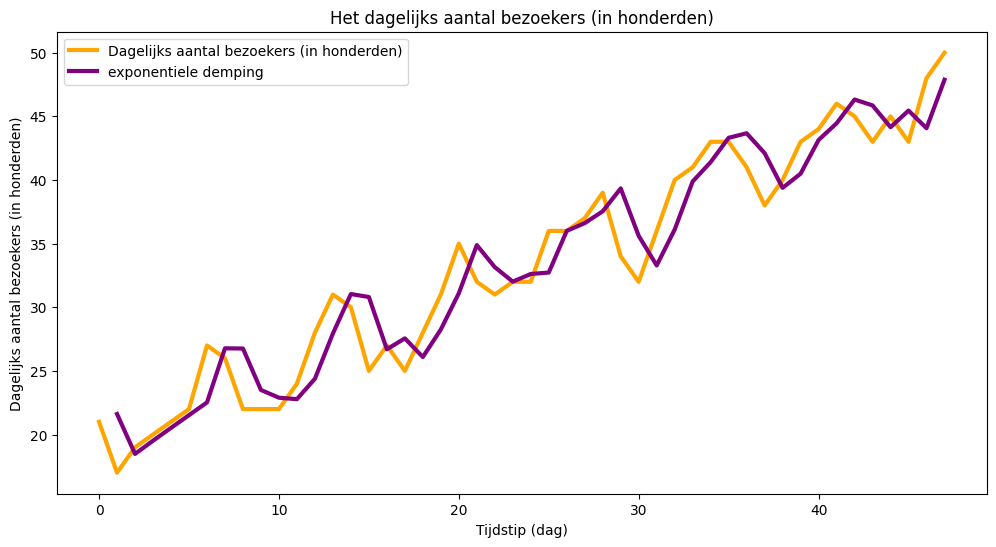

In [17]:
dataset['Dagelijks aantal bezoekers (in honderden)'].plot(color='orange',linewidth=3, figsize=(12,6))
dataset['voorspelling exponentiele demping'].plot(color='purple',linewidth=3)
plt.legend(labels=['Dagelijks aantal bezoekers (in honderden)','exponentiele demping'])
plt.title("Het dagelijks aantal bezoekers (in honderden)")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])


## <span style="color:deeppink"> Seizoensregressie
Eerst gaan we het gemiddelde berekenen volgens de dag van de week.
Je kunt dit doen aan de hand van de functie: `dataset.groupby()`  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [19]:
df = dataset.groupby(['Dag van de week']).mean()
df

,Dagelijks aantal bezoekers (in honderden),trendlijn,residuen,exponentiele demping,absolute fout exponentiele demping,voorspelling exponentiele demping
Dag van de week,,,,,,
Dinsdag,30.428571,32.268563,-1.839991,2.188610,4.028602,34.457173
Donderdag,31.142857,33.493812,-2.350955,-1.964893,1.476349,31.528919
Maandag,33.714286,31.655938,2.058348,2.845898,1.299286,36.646023
Vrijdag,34.285714,34.106437,0.179277,-2.278762,2.458039,31.827676
Woensdag,30.714286,32.881188,-2.166902,-1.086643,1.559919,31.794545
Zaterdag,36.000000,34.719062,1.280938,-0.280376,1.561516,34.438686
Zondag,36.500000,33.187500,3.312500,0.817301,2.495199,34.004801


In [20]:
seizoensregressie = []
for i in range(len(dataset)):
    seizoensregressie.append(dataset.loc[i,'trendlijn'] + df.loc[dataset.loc[i,'Dag van de week'],'residuen'])

dataset['seizoensregressie'] = seizoensregressie
dataset.head()

,Dagelijks aantal bezoekers (in honderden),Dag van de week,trendlijn,residuen,exponentiele demping,absolute fout exponentiele demping,voorspelling exponentiele demping,seizoensregressie
Tijdstip (dag),,,,,,,,
0,21,Maandag,18.790816,2.209184,NaN,NaN,NaN,20.849164
1,17,Dinsdag,19.403441,-2.403441,2.209184,4.612625,21.612625,17.563450
2,19,Woensdag,20.016066,-1.016066,-1.540880,0.524814,18.475186,17.849164
3,20,Donderdag,20.628691,-0.628691,-1.114206,0.485515,19.514485,18.277736
4,21,Vrijdag,21.241316,-0.241316,-0.719482,0.478167,20.521833,21.420593


Zeker! Deze code berekent voor elke rij in je dataset de **seizoensgecorrigeerde voorspelling** (oftewel: seizoensregressie). Hieronder leg ik uit wat er gebeurt en waarom het werkt.

---

## 🔁 **Wat doet deze code precies?**

```python
seizoensregressie = []

for i in range(len(dataset)):
    seizoensregressie.append(
        dataset.loc[i, 'trendlijn'] + df.loc[dataset.loc[i, 'Dag van de week'], 'residuen']
    )

dataset['seizoensregressie'] = seizoensregressie
```

---

## 🧠 Stap-voor-stap uitleg:

| Stap                                 | Wat gebeurt er?                                                                         |
| ------------------------------------ | --------------------------------------------------------------------------------------- |
| `for i in range(len(dataset))`       | Loop over elke rij in je dataset                                                        |
| `dataset.loc[i, 'trendlijn']`        | Haal de voorspelde waarde uit de **trendlijnkolom** op rij *i*                          |
| `dataset.loc[i, 'Dag van de week']`  | Haal de naam van de dag (bijv. 'Maandag') op voor die rij                               |
| `df.loc[dagnaam, 'residuen']`        | Zoek in een aparte tabel `df` de **gemiddelde residu (seizoenseffect)** op voor die dag |
| `+`                                  | Tel het seizoenseffect op bij de trendlijn → dit is de **seizoensvoorspelling**         |
| `seizoensregressie.append(...)`      | Voeg die voorspelling toe aan een lijst                                                 |
| `dataset['seizoensregressie'] = ...` | Sla de lijst op als nieuwe kolom in je dataset                                          |

---

## 📊 Wat is het doel?

Je modelleert de waarde van een tijdreeks als:

```
voorspelling = trendlijn + seizoenseffect
```

In Excel deed je dit met `=trendlijn + VLOOKUP(dag, tabel_met_residuen)`.
In Python gebeurt hetzelfde met `.loc[]`.

---

## 🧩 Voorbeeld:

Stel:

* Dag = "Dinsdag"
* Trendlijn = 20.5
* Gemiddelde residu (seizoenseffect) voor Dinsdag = -1.8

Dan wordt:

```python
seizoensregressie = 20.5 + (-1.8) = 18.7
```

---

## ❗ Let op:

* Dit werkt alleen goed als `df` een DataFrame is waarin **de index bestaat uit dag-namen** ("Maandag", "Dinsdag", enz.).
* Als je `df` een tabel is met `Dag van de week` en `residuen`, dan moet `df.set_index("Dag van de week", inplace=True)` gedaan zijn vóór deze code.

---

Wil je dat ik je help om deze code ook in een plot te visualiseren, samen met de echte data?


In [21]:
dataset['absolute fout seizoensregressie'] = abs(dataset['Dagelijks aantal bezoekers (in honderden)'] - dataset['seizoensregressie'])
dataset.head()

,Dagelijks aantal bezoekers (in honderden),Dag van de week,trendlijn,residuen,exponentiele demping,absolute fout exponentiele demping,voorspelling exponentiele demping,seizoensregressie,absolute fout seizoensregressie
Tijdstip (dag),,,,,,,,,
0,21,Maandag,18.790816,2.209184,NaN,NaN,NaN,20.849164,0.150836
1,17,Dinsdag,19.403441,-2.403441,2.209184,4.612625,21.612625,17.563450,0.563450
2,19,Woensdag,20.016066,-1.016066,-1.540880,0.524814,18.475186,17.849164,1.150836
3,20,Donderdag,20.628691,-0.628691,-1.114206,0.485515,19.514485,18.277736,1.722264
4,21,Vrijdag,21.241316,-0.241316,-0.719482,0.478167,20.521833,21.420593,0.420593


Zeker! Deze regel:

```python
dataset['absolute fout seizoensregressie'] = abs(dataset['Dagelijks aantal bezoekers (in honderden)'] - dataset['seizoensregressie'])
```

voegt een nieuwe kolom toe die de **absolute fout** berekent van de voorspelling via de **seizoensregressie**. Hieronder leg ik het stap voor stap uit:

---

## 📌 Wat gebeurt hier?

| Onderdeel                                              | Betekenis                                                       |
| ------------------------------------------------------ | --------------------------------------------------------------- |
| `dataset['Dagelijks aantal bezoekers (in honderden)']` | De **werkelijke gemeten waarde** (observatie)                   |
| `dataset['seizoensregressie']`                         | De **voorspelde waarde** via trendlijn + seizoenseffect per dag |
| `-`                                                    | Verschil tussen werkelijkheid en voorspelling = **fout**        |
| `abs(...)`                                             | Neemt de **absolute waarde** van de fout (dus altijd positief)  |
| `dataset['absolute fout seizoensregressie'] = ...`     | Slaat dit verschil op in een nieuwe kolom                       |

---

## 🧠 Waarom absolute fout?

* Positieve en negatieve fouten heffen elkaar niet op.
* Je krijgt een zuivere maat voor hoe **ver** je naast de echte waarde zit.

---

## 📊 Voorbeeld:

| Echte waarde | Seizoensregressie | Fout | Absolute fout |
| ------------ | ----------------- | ---- | ------------- |
| 21.0         | 20.8              | 0.2  | 0.2           |
| 18.0         | 16.4              | 1.6  | 1.6           |

---

### 🎯 Doel:

Deze kolom helpt je:

* Te evalueren hoe goed het **seizoensmodel** presteert,
* En te vergelijken met andere modellen zoals **trendlijn** of **exponentiële demping**.

Wil je dat ik nu de gemiddelde fout (MAE) bereken voor elke methode en ze vergelijk?


In [22]:
print(" De mean absolute error is:",round(dataset['absolute fout seizoensregressie'].mean(),2))

 De mean absolute error is: 0.97


Text(0, 0.5, 'Dagelijks aantal bezoekers (in honderden)')

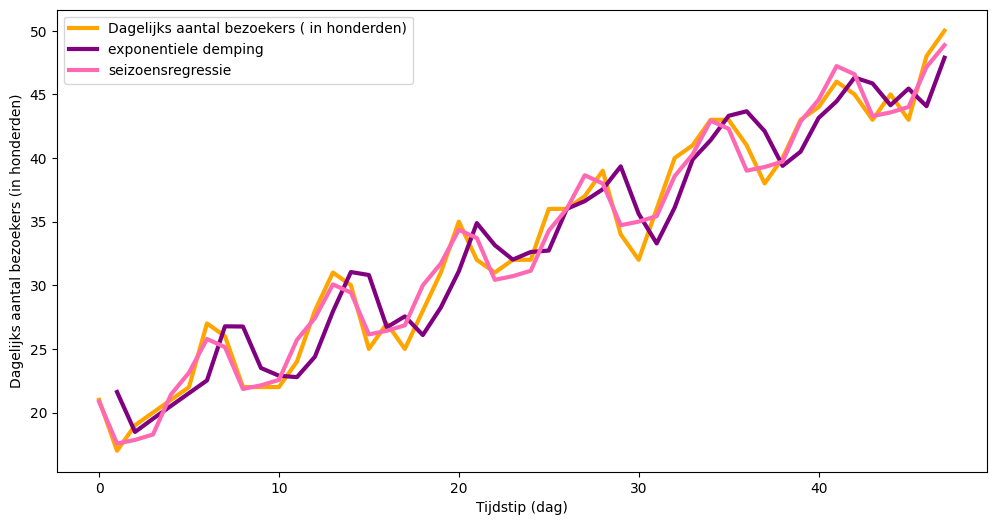

In [24]:
dataset['Dagelijks aantal bezoekers (in honderden)'].plot(color='orange',linewidth=3,figsize=(12,6))
dataset['voorspelling exponentiele demping'].plot(color='purple',linewidth=3)
dataset['seizoensregressie'].plot(color='hotpink',linewidth=3)
plt.legend(labels = ['Dagelijks aantal bezoekers ( in honderden)','exponentiele demping','seizoensregressie'])
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])